## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

Загрузим необходимые библиотеки

In [929]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import missingno as msno
import statsmodels as sm

import warnings
warnings.filterwarnings("ignore")

Зададим параметры визулиализации для всех графиков (стиль, шрифт)

In [930]:
plt.style.use('seaborn-v0_8-whitegrid')
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 14}
mpl.rc('font', **font)

## 1. Explorative data analysis

In [931]:
df = pd.read_csv("clients.csv")
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [932]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

Выполним предварительную оценку датасета. Отмечаем, что данные в столбце "Price" имеют тип "object". Для работы с данными из этого столбца нам потребуется изменить тип данных на числовой, одновременно выполнив их форматирование. Отмечаем, что ряд столбцов содержат дублирующую информацию (например, "Age at time of purchase" и "Y"). Если данные в них действительно идентичны, один из этих столбцов можно удалить. Кроме того, исходя из условий задачи, мы можем удалить ряд столбцов, которые нам не понадобятся при анализе (например, "Building", "Status", "Name", "Surname", "M", "D"). Также отмечаем, что в столбцах "Age at time of purchase", "Age Interval", "Y", "M", "D" и "State" присутствуют значения nan.

Кроме того, выполним проверку на наличие дублирующихся строк. Такие строки отсутствуют

In [933]:
print(df.duplicated().sum())

0


Построим матрицу нулевых строк в датасете.

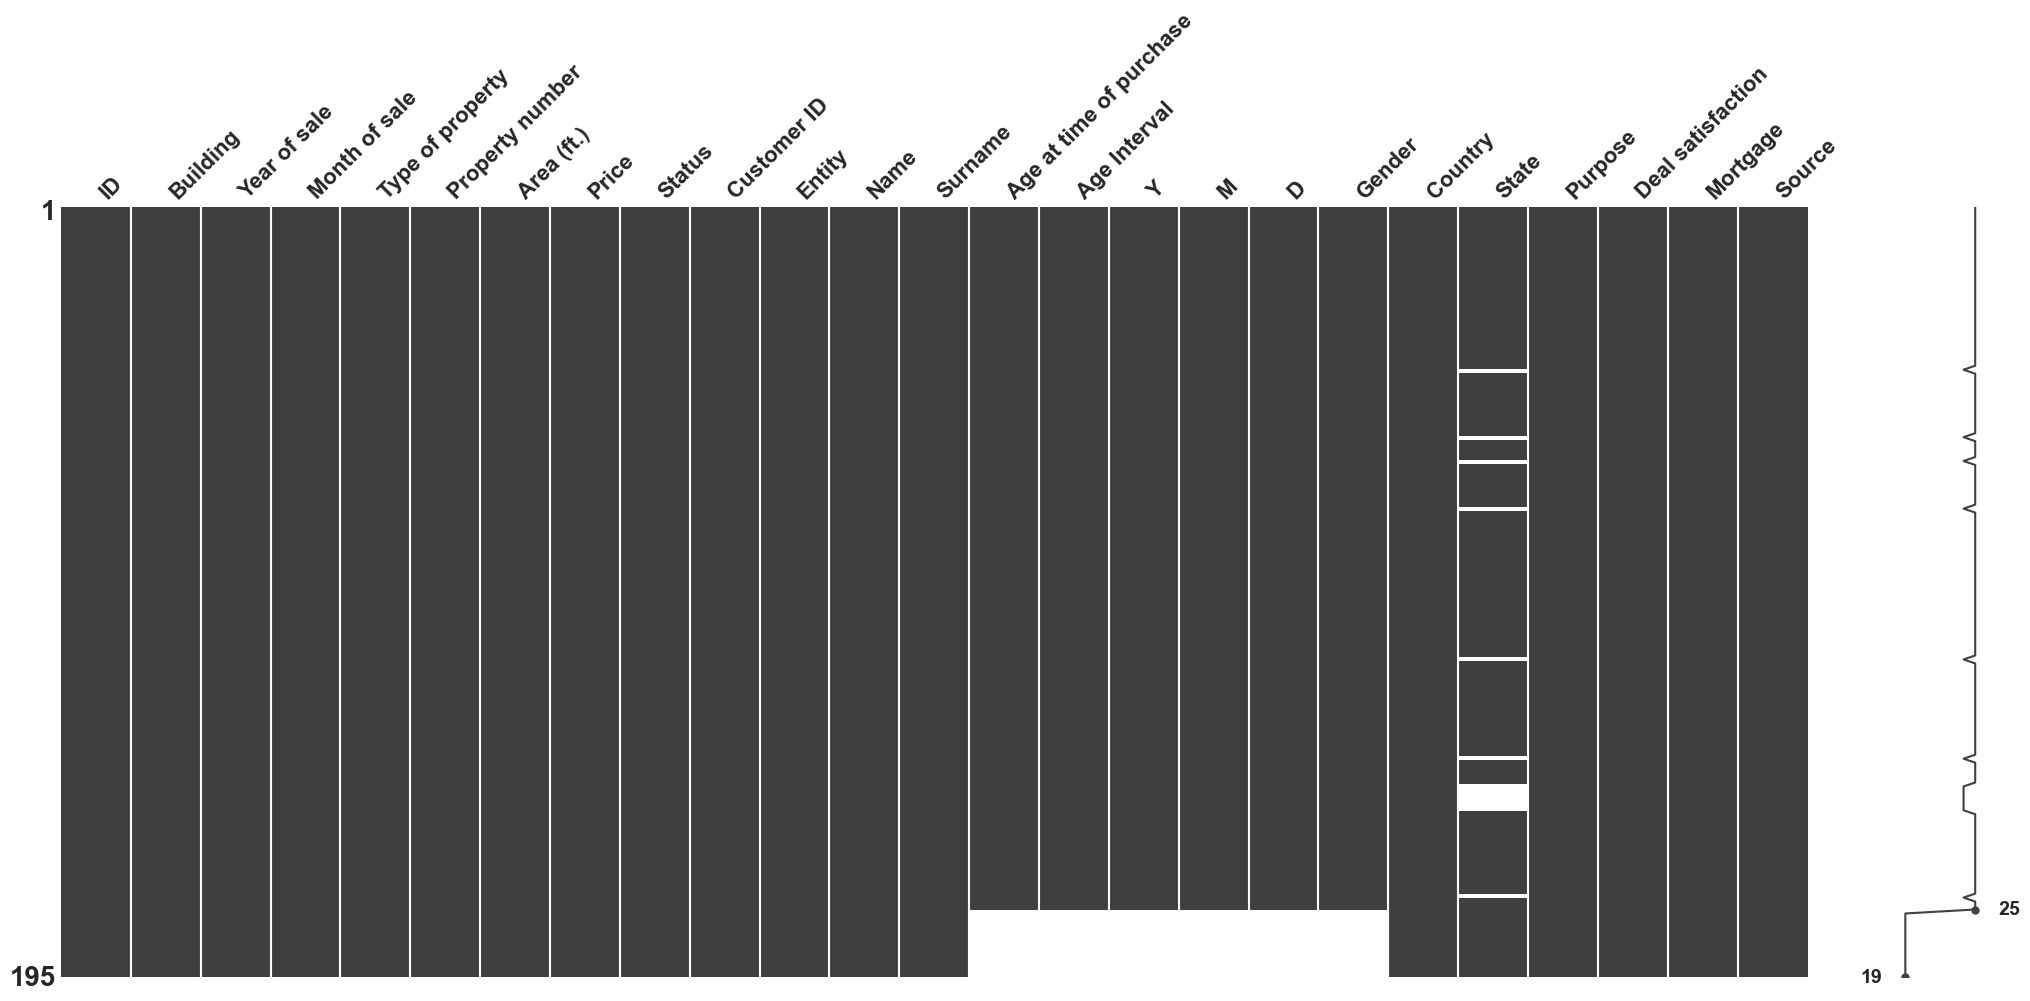

In [934]:
msno.matrix(df)
plt.show()

Отмечаем, что значения nan присутствуют в столбцах "Age at time of purchase", "Age Interval", "Y", "M", "D", "Gender" в последних 17 строках датасета, а также в столбце "State".

Как отмечалось выше, столбцы "Age at time of purchase" и "Y" могут иметь дублирующуюся информацию. Проверим, соответствуют ли друг другу данные в столбцах "Age at time of purchase" и "Y". Определим индексы строк с ненулевыми значениями в столбце "Age at time of purchase" и "Y".

In [935]:
index_age_not_null = df[~df["Age at time of purchase"].isna()].index
index_age_not_null

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
      dtype='int64', length=178)

Оценим, совпадают ли данные в столбцах "Y" и "Age at time of purchase", вычислив возраст покупателя с помощью столбцов "Year of sale" и "Y" и сравнив полученный результат с данными в столбце "Age at time of purchase". Результат True свидетельствует о полном подобии данных в столбцах "Y" и "Age at time of purchase". Поэтому мы можем удалить столбец "Y".

In [936]:
Age = df.loc[index_age_not_null, "Year of sale"] - df.loc[index_age_not_null, "Y"]
all(Age == df.loc[index_age_not_null, "Age at time of purchase"])

True

Удалим ненужные столбцы для облегчения визуального представления данных

In [937]:
df.drop(columns=["Building", "Property number", "Status", "Y", "M", "D", "Name", "Surname"], inplace=True)
df.head()

,ID,Year of sale,Month of sale,Type of property,Area (ft.),Price,Customer ID,Entity,Age at time of purchase,Age Interval,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,2005,11,Apartment,743.09,"$ 246,172.68",C0028,Individual,19.0,18-25,F,USA,California,Home,5,No,Website
1,1029,2005,10,Apartment,756.21,"$ 246,331.90",C0027,Individual,22.0,18-25,F,USA,California,Home,5,No,Website
2,2002,2007,7,Apartment,587.28,"$ 209,280.91",C0112,Individual,22.0,18-25,M,USA,California,Home,1,Yes,Client
3,2031,2007,12,Apartment,1604.75,"$ 452,667.01",C0160,Individual,22.0,18-25,M,USA,California,Investment,3,Yes,Website
4,1049,2004,11,Apartment,1375.45,"$ 467,083.31",C0014,Individual,25.0,18-25,F,USA,California,Home,4,No,Agency


Приведем данные в столбце "Price" к числовому виду, выполнив одновременно с этим форматирование данных. Переведем первые 5 строк из столбца "Price" в формат list для изучения формата данных

In [938]:
df["Price"].to_list()[:5], df["Price"].dtype

([' $ 246,172.68 ',
  ' $ 246,331.90 ',
  ' $ 209,280.91 ',
  ' $ 452,667.01 ',
  ' $ 467,083.31 '],
 dtype('O'))

Удалим мешающие символы в начале и конце каждой записи, а также заменим "," на ""

In [939]:
df["Price"] = df["Price"].str.lstrip(" $ ").str.rstrip(" ").str.replace(",", "")
df["Price"] = df["Price"].astype(float)
df["Price"].to_list()[:5], df["Price"].dtype

([246172.68, 246331.9, 209280.91, 452667.01, 467083.31], dtype('float64'))

Изучим строки с нулевыми значениями в столбце "Age at time of purchase". Эти данные присутствуют в нижней части датасета

In [940]:
df.tail()

,ID,Year of sale,Month of sale,Type of property,Area (ft.),Price,Customer ID,Entity,Age at time of purchase,Age Interval,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
190,1022,2005,7,Apartment,743.09,210745.17,C0174,Firm,NaN,NaN,NaN,USA,California,Investment,5,No,Website
191,1028,2005,7,Apartment,1160.36,331154.88,C0174,Firm,NaN,NaN,NaN,USA,California,Investment,5,No,Website
192,1034,2005,7,Apartment,625.80,204434.68,C0174,Firm,NaN,NaN,NaN,USA,California,Investment,5,No,Website
193,1037,2005,7,Apartment,756.21,189194.31,C0174,Firm,NaN,NaN,NaN,USA,California,Investment,5,No,Website
194,1042,2005,7,Apartment,625.80,204027.09,C0174,Firm,NaN,NaN,NaN,USA,California,Investment,5,No,Website


Отмечаем, что значения NaN в столбцах "Age at time of purchase", "Age Interval", "Gender" соответствуют Firm в столбце "Entity". В этом заключается причина отсутствия этих данных. Проверим это утверждение, сравнив индексы строк для столбца "Age at time of purchase", в которых присутствуют значения NaN, и индексы строк для столбца "Entity", в которых присутствуют значения "Firm".

In [941]:
index_age_null = df[df["Age at time of purchase"].isna()].index
index_age_null

Index([178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194],
      dtype='int64')

In [942]:
index_firm = df[df["Entity"] == "Firm"].index
index_firm

Index([178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194],
      dtype='int64')

In [943]:
all(index_age_null == index_firm)

True

Отмечаем, что это одинаковые строки. Выбросить мы их не можем, поскольку, тем самым, удалим важную информацию, касающуюся фирм. Но и заменить на "Unknown" тоже невозможно, поскольку тип данных в столбце "Age at time of purchase" измениться с цифрового на "object". Поэтому оставим эти значения без изменения, учитывая, что они не окажут негативного влияния на последующий анализ.

Изучим нулевые значения в столбце "State"

In [944]:
df["State"].value_counts(dropna=False)

State
California    119
Nevada         17
NaN            14
Colorado       11
Oregon         11
Arizona        11
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: count, dtype: int64

In [945]:
df.loc[df[df["State"].isna()].index, :]

,ID,Year of sale,Month of sale,Type of property,Area (ft.),Price,Customer ID,Entity,Age at time of purchase,Age Interval,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
41,1032,2005,1,Apartment,782.25,215410.28,C0015,Individual,36.0,36-45,F,Belgium,NaN,Home,2,No,Agency
58,2025,2007,2,Apartment,927.83,315733.15,C0070,Individual,40.0,36-45,F,Russia,NaN,Home,1,No,Agency
64,2005,2006,9,Apartment,785.48,257183.48,C0047,Individual,41.0,36-45,F,Denmark,NaN,Investment,1,No,Agency
76,3049,2007,4,Apartment,1283.45,338181.18,C0084,Individual,42.0,36-45,M,Mexico,NaN,Home,3,No,Agency
114,2003,2006,12,Apartment,927.08,289727.99,C0063,Individual,51.0,46-55,M,Russia,NaN,Investment,3,No,Agency
139,3050,2006,11,Apartment,977.87,248274.31,C0059,Individual,57.0,56-65,F,Russia,NaN,Home,3,Yes,Agency
146,2019,2007,3,Apartment,649.80,177555.06,C0079,Individual,60.0,56-65,M,Canada,NaN,Investment,5,No,Website
147,2021,2007,4,Apartment,785.48,217748.48,C0079,Individual,60.0,56-65,M,Canada,NaN,Investment,5,No,Website
148,2027,2007,4,Apartment,785.48,247739.44,C0079,Individual,60.0,56-65,M,Canada,NaN,Investment,5,No,Website
149,2052,2007,3,Apartment,1615.29,484458.03,C0079,Individual,60.0,56-65,M,Canada,NaN,Investment,5,No,Website


Отмечаем, что значения NaN в столбце "State" относятся к странам, отличным от USA. Поэтому в данном случае заменим значения NaN на "Not Applicable"

In [946]:
df.fillna({"State":"Not Applicable"}, inplace=True)
df["State"].value_counts(dropna=False)

State
California        119
Nevada             17
Not Applicable     14
Colorado           11
Oregon             11
Arizona            11
Utah                6
Virginia            4
Kansas              1
Wyoming             1
Name: count, dtype: int64

Кроме того, при анализе датасета обнаружена неприемлемая орфография в названии столбца "Age Interval " (пробел в конце). Аналогичная ситуация в столбце "Country" для "USA ".

In [947]:
df.columns

Index(['ID', 'Year of sale', 'Month of sale', 'Type of property', 'Area (ft.)',
       'Price', 'Customer ID', 'Entity', 'Age at time of purchase',
       'Age Interval ', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [948]:
df["Country"].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada'], dtype=object)

In [949]:
df["Country"] = df["Country"].str.strip()
df["Country"].unique()

array(['USA', 'UK', 'Belgium', 'Russia', 'Denmark', 'Germany', 'Mexico',
       'Canada'], dtype=object)

In [950]:
df = df.rename(columns={"Age Interval ": "Age Interval"})
df.columns

Index(['ID', 'Year of sale', 'Month of sale', 'Type of property', 'Area (ft.)',
       'Price', 'Customer ID', 'Entity', 'Age at time of purchase',
       'Age Interval', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

<Axes: >

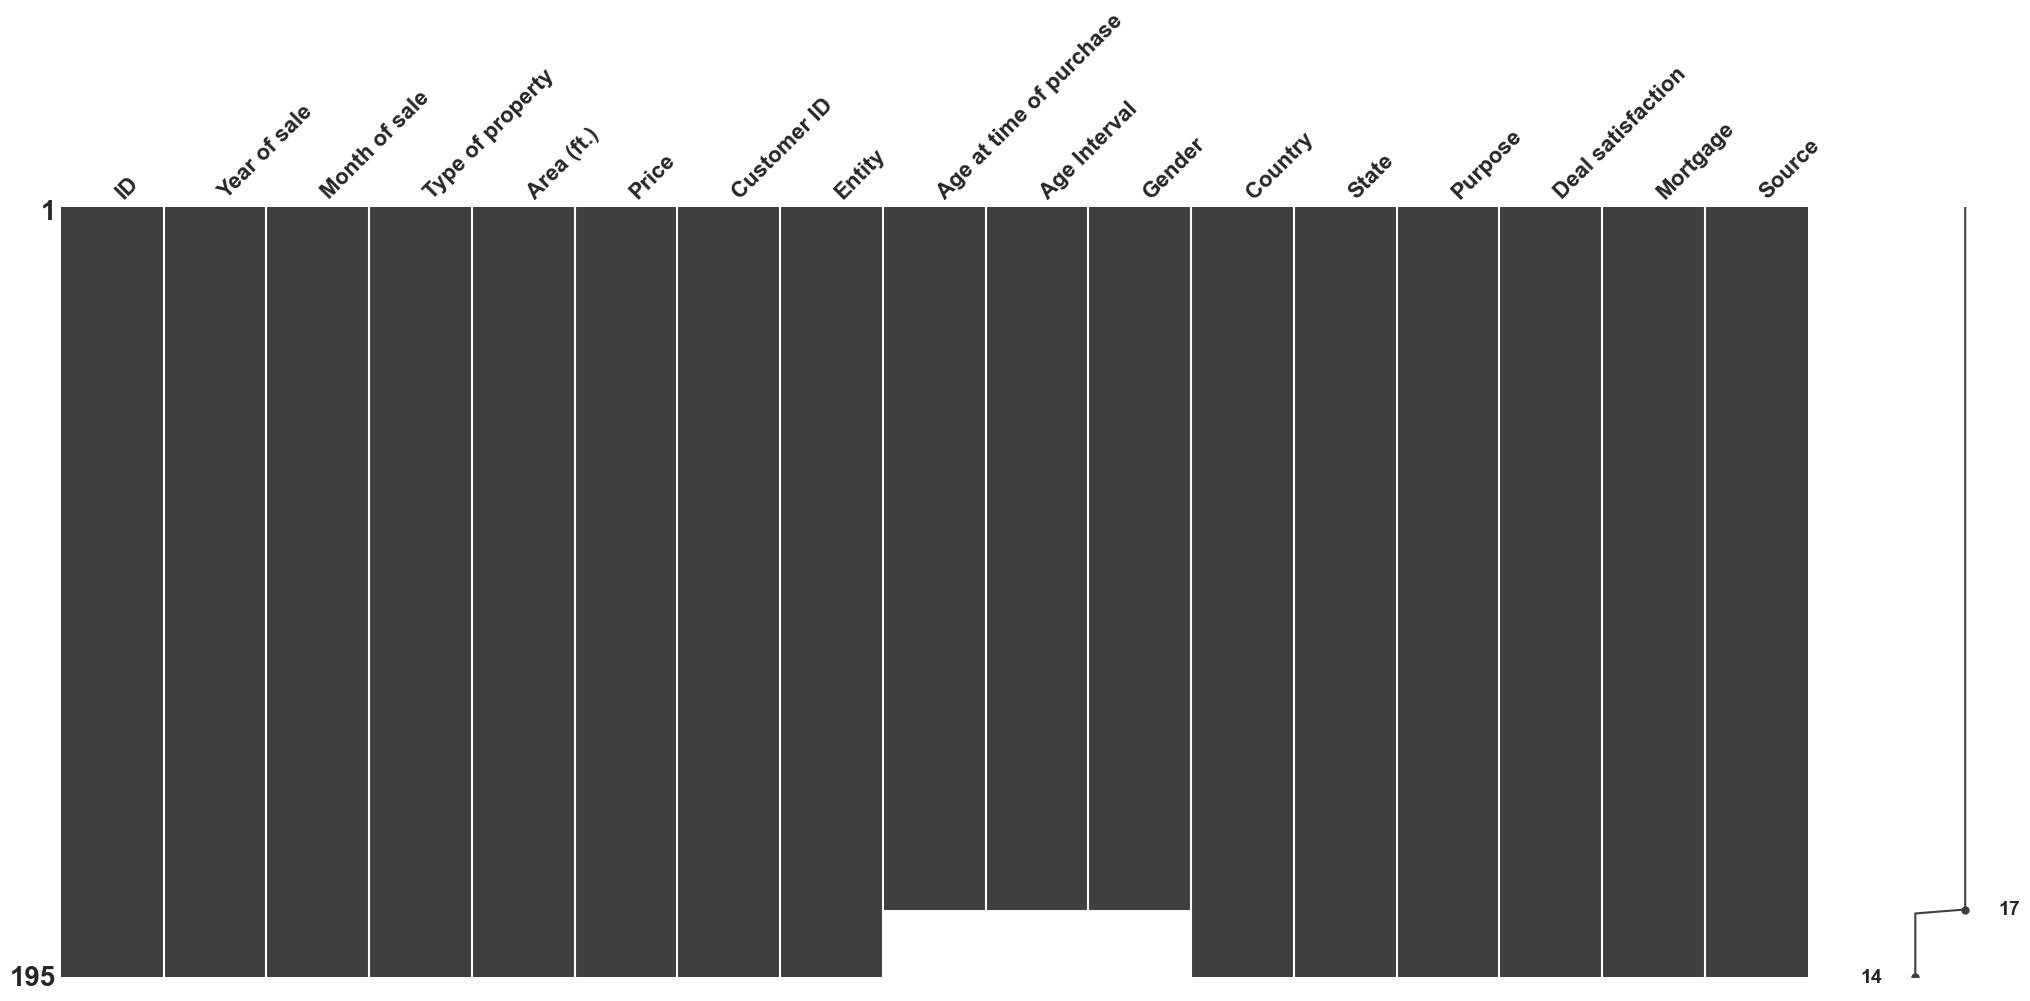

In [951]:
msno.matrix(df)

## 2. Анализ целевого покупателя

Выполняя ранее анализ данных в столбце "Entity", мы установили, что покупателями недвижимости являются индивидуальные лица и компании.

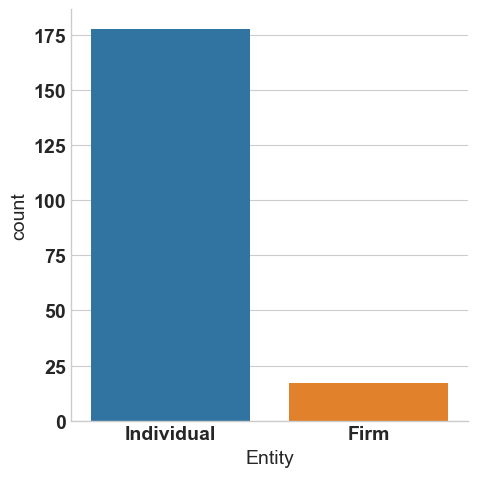

In [952]:
sns.catplot(kind="count", data=df, x="Entity", hue = "Entity", errorbar=None)
plt.show()

Анализ представленной выше диаграммы показывает, что основными покупателями являются индивидуальные лица. Лишь небольшую долю составляют компании.

Приведенная ниже коробчатая диаграмма дополняет этот вывод. Медианная стоимость покупок для индивидуальных лиц выше, чем для компаний, как и разброс значений. В целом, индивидуальные лица нацелены на покупку более дорогой недвижимости, чем компании.

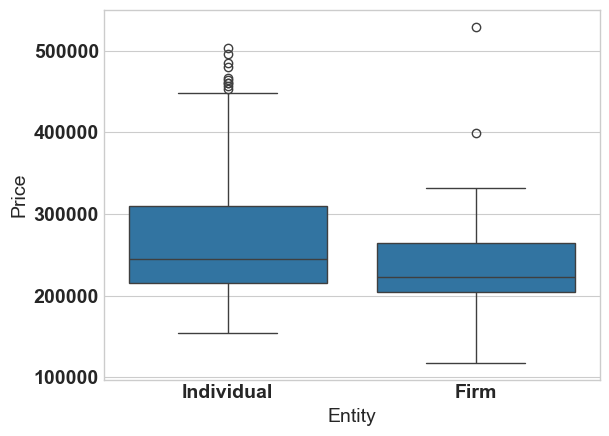

In [953]:
sns.boxplot(data=df, x="Entity", y="Price")
plt.show()

Попытаемся определить возраст индивидуального лица, приобретающего недвижимость в данной риелторской компании. При сортировке по возрасту на момент приобретения недвижимости мы отмечаем, что преобладающим был возраст 48 лет. Однако такая оценка подвержена серьезным колебаниям и не является надежной. Более надежной будет анализ возрастных интервалов покупателей недвижимости. Отмечаем, что наиболее активными покупателями являются лица в возрасте от 36 до 45 лет.

In [954]:
df.groupby("Age at time of purchase").size().sort_values(ascending=False).head()

Age at time of purchase
48.0    11
41.0     8
60.0     7
44.0     6
33.0     6
dtype: int64

In [955]:
df["Age Interval"].value_counts(dropna=False)

Age Interval
36-45    52
46-55    41
26-35    36
56-65    26
65+      18
NaN      17
18-25     5
Name: count, dtype: int64

Графическое представление приведенных выше данных выполнено в виде гистограммы. Она свидетельствует о том, что более активными покупателями являются лица в возрасте от 26 до 55 лет, при этом наиболее активны лица от 36 до 45 лет, как мы уже отмечали выше.

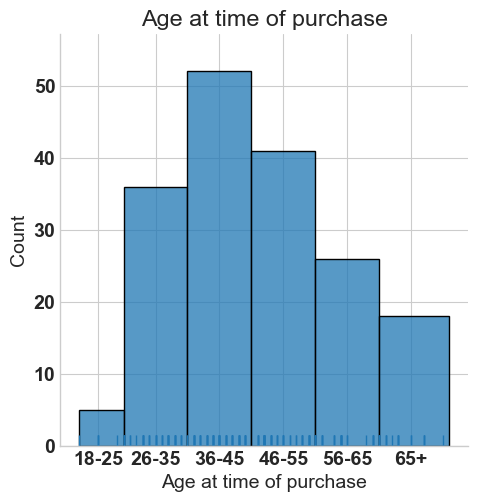

In [956]:
fig = sns.displot(data=df["Age at time of purchase"].sort_values(ascending=True), rug=True, bins=[19, 26, 36, 46, 56, 66, 77])
plt.title("Age at time of purchase")
plt.xticks([22, 31, 41, 51, 61, 71], labels=df["Age Interval"].value_counts().index.sort_values())
plt.show()

Что касается пола индивидуальных покупателей, то основными покупателями являются мужчины (соотношение с женщинами: 60:40).

In [957]:
df["Gender"].value_counts()

Gender
M    108
F     70
Name: count, dtype: int64

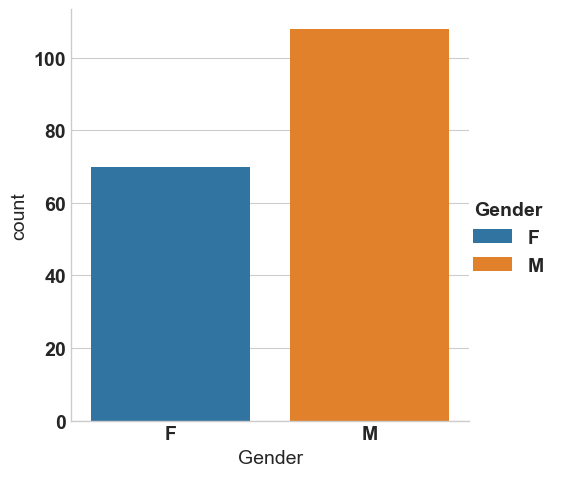

In [958]:
sns.catplot(kind="count", data=df, x="Gender", hue = "Gender", errorbar=None)
plt.show()

Что касается типа собственности, чаще всего приобретаемого покупателями, то в данном случае вывод однозначен. Подавляющее большинство сделок относится к приобретению квартир, а не офисных помещений. В данном случае мы провели разделение между индивидуальными лицами и компаниями, поскольку последние, вероятно, более заинтересованы в приобретении офисной недвижимости. Однако анализ показывает, что и среди компаний преобладают покупки жилой, а не офисной недвижимости.

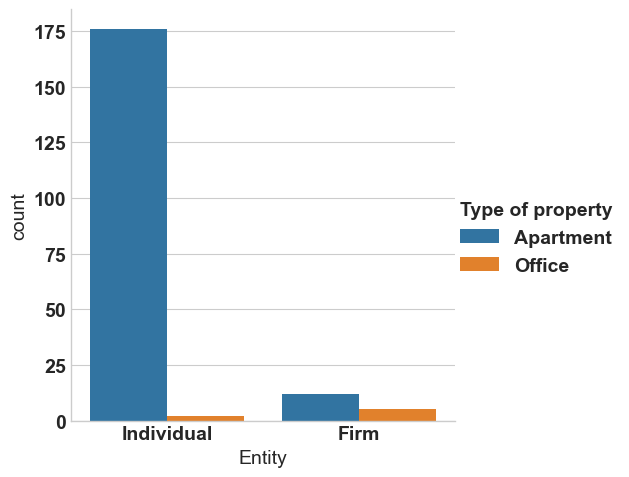

In [959]:
sns.catplot(kind="count", data=df, x="Entity", hue = "Type of property", errorbar=None)
plt.show()

Однако с точки зрения стоимости приобретенной недвижимости и индивидуальные лица, и фирмы тратили на приобретение офисных помещений значительно больше стредств, чем жилой недвижимости. Эту информацию следует учитывать, если риелтроская компания получает прибыль как процент от стоимости проданной недвижимости.

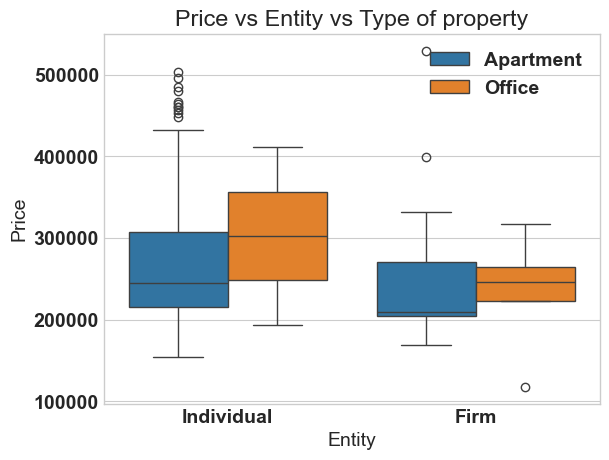

In [960]:
sns.boxplot(data=df, x = "Entity", y = "Price", hue = "Type of property")
plt.title("Price vs Entity vs Type of property")
plt.legend(loc="best")
plt.show()

Какова средняя площадь приобретаемой недвижимости? Для ответа на этот вопрос изучим данные, полученные с помощью функции describe()

In [961]:
df["Area (ft.)"].describe()

count     195.000000
mean      899.867128
std       261.489550
min       410.710000
25%       739.860000
50%       785.480000
75%      1075.460000
max      1942.500000
Name: Area (ft.), dtype: float64

Отмечаем, что среднее значение составляет около 900 кв. футов, а медиана - 785 кв. футов, при этом минимальное (410) и максимальное (1942) значения различаются почти в 5 раз, что свидетельствует о большом разбросе данных. Кроме того, меньшее значение медианы по сравнении со средним значением указывает на искажение данных и смещение их вправо. В таком случае, правильной оценкой будет медиана. Для графического отображения данных выберем коробчатую диаграмму и гистограмму.

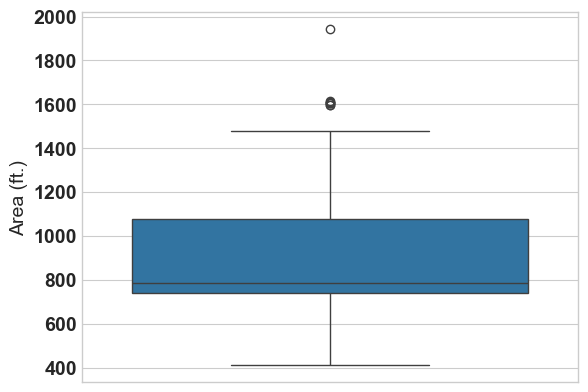

In [962]:
sns.boxplot(data=df, y="Area (ft.)")
plt.show()

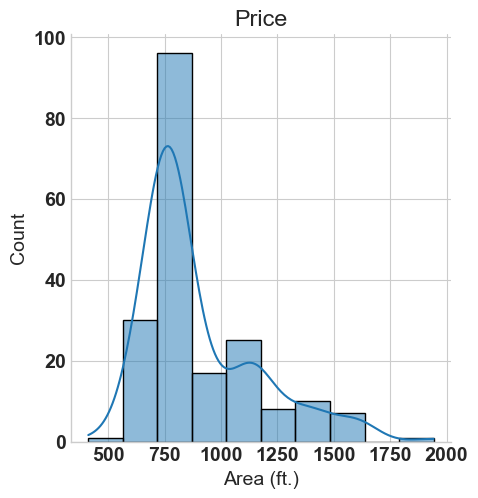

In [963]:
sns.displot(data=df["Area (ft.)"], kind="hist", kde= True, bins=10)
plt.title("Price")
plt.xticks([500, 750, 1000, 1250, 1500, 1750, 2000])
plt.show()

Интересно было бы узнать, как распределяется площадь приобретаемой недвижимости в зависимости от пола покупателя.

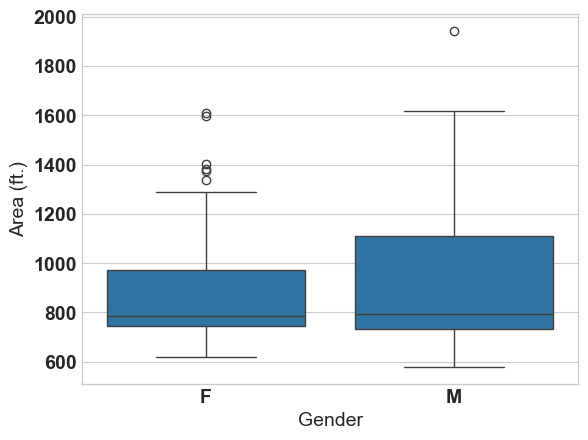

In [964]:
sns.boxplot(data=df, x = "Gender", y="Area (ft.)")
plt.show()

Диаграмма показывает, что, несмотря на то, что медиана площади приобретаемой недвижимости равна для мужчин и женщин, разброс данных для мужчин больше, чем женщин. Т.е. женщины склонны приобретать недвижимость приблизительно одинаковой небольшой площади, а мужчины - разной площади (и более низкой, и более высокой), но медианные значения равны.

Аналогичная картина, судя по всему, должна наблюдаться и со средним чеком. Изучим имеющиеся данные.

Средняя стоимость приобретаемой недвижимости составляет 270 тыс. долл., а медиана - 243 тыс. долл., при этом минимальное (118 тыс. долл.) и максимальное (529 тыс. долл.) значения различаются более чем в 4 раза, что свидетельствует о большом разбросе данных. Кроме того, меньшее значение медианы по сравнении со средним значением указывает на искажение данных и смещение их вправо. В таком случае, правильной оценкой будет медиана. Для графического отображения данных выберем коробчатую диаграмму и гистограмму.

In [965]:
df["Price"].describe()

count       195.000000
mean     269434.560923
std       80129.094465
min      117564.070000
25%      212393.250000
50%      243052.590000
75%      308550.875000
max      529317.280000
Name: Price, dtype: float64

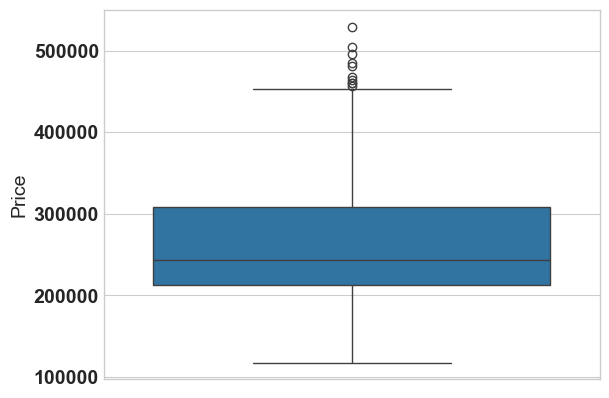

In [966]:
sns.boxplot(data=df, y="Price")
plt.show()

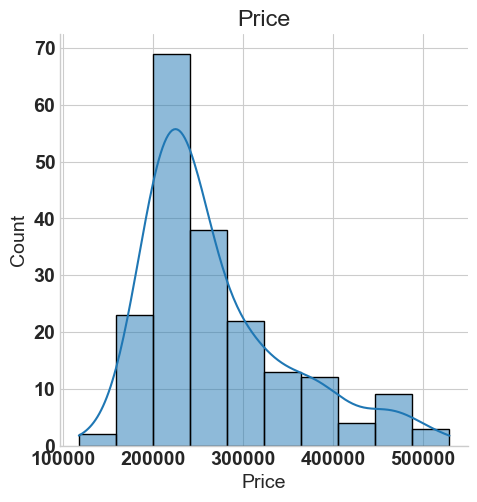

In [967]:
sns.displot(data=df["Price"], kind="hist", kde= True, bins=10)
plt.title("Price")
plt.show()

Диаграмма ниже показывает, что, несмотря на то, что медиана средней стоимости приобретаемой недвижимости равна для мужчин и женщин, разброс данных для мужчин больше, чем женщин (но он не так велик, как в случае площади недвижимости). Возможно, женщины приобретают более качественную недвижимость либо мужчины лучше торгуются, получая недвижимость большей площади за относительно меньшие деньги.

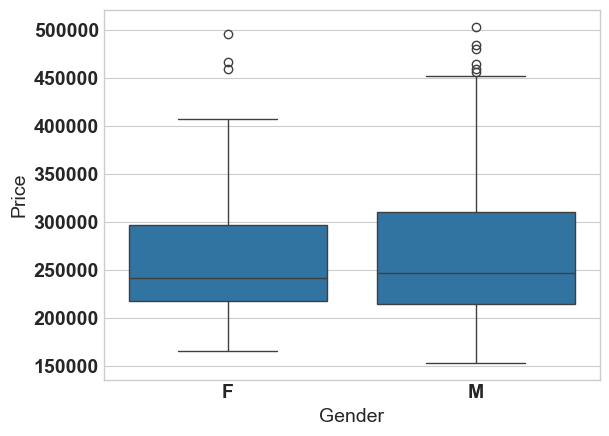

In [968]:
sns.boxplot(data=df, x="Gender", y="Price")
plt.show()

Чтобы связать данные по площади и стоимости недвижимости с полом покупателя построим точечный график. Как мы и отмечали выше мужчины более склонны приобретать более дорогую недвижимость большей площади.

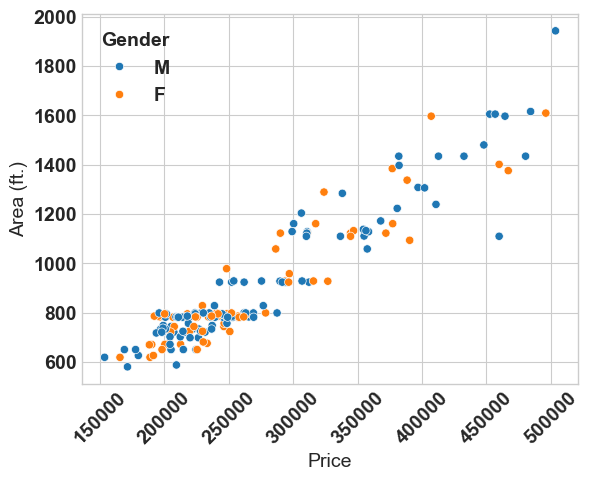

In [969]:
sns.scatterplot(data=df, x="Price", y="Area (ft.)", hue="Gender", hue_order=["M", "F"])
plt.xlabel("Price")
plt.ylabel("Area (ft.)")
plt.xticks(rotation=45)
plt.show()

Какова цель приобретения недвижимости? Приведенная ниже коробчатая диаграмма показывает, что индивидуальные лица в 2 раза чаще приобретают недвижимость для собственного проживания, чем для инвестиций, в то время как компании практически во всех случаях нацелены на инвестирование средств.

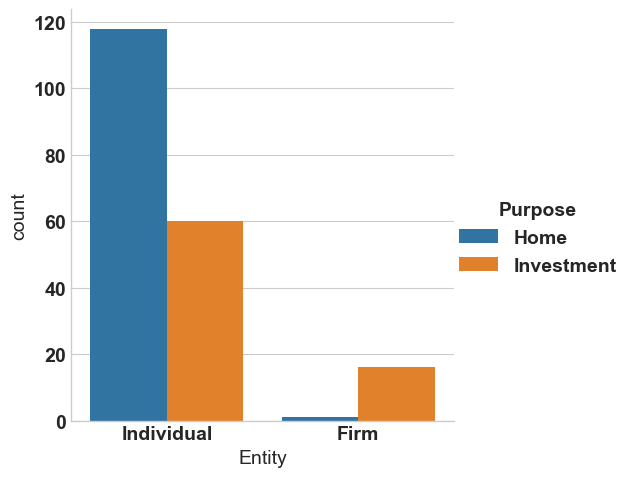

In [970]:
sns.catplot(kind='count', data=df, x="Entity", hue="Purpose", errorbar=None)
plt.show()

Мужчины и женщины также чаще приобретают недвижимость для проживания, однако инвестиционные покупки среди мужчин встречаются чаще.

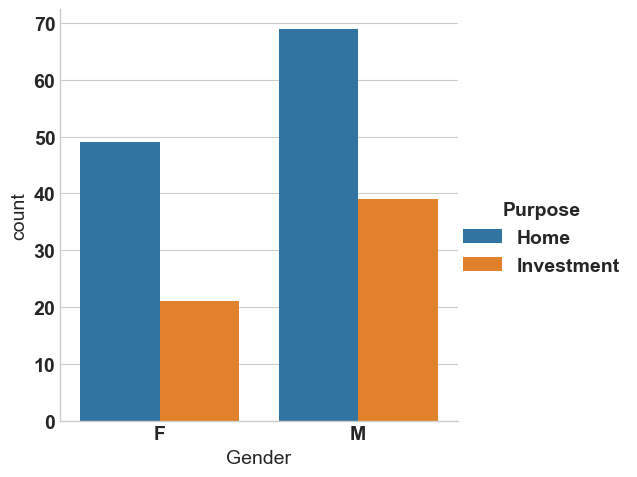

In [971]:
sns.catplot(kind='count', data=df, x="Gender", hue="Purpose", errorbar=None)
plt.show()

Рассмотрим, что явилось источником клиентов в данной риелторской компании. Основными источниками лидов являлись агентства, предыдущие клиенты и интернет-сайт. Рассмотрим количество сделок в зависимости от источника лида.

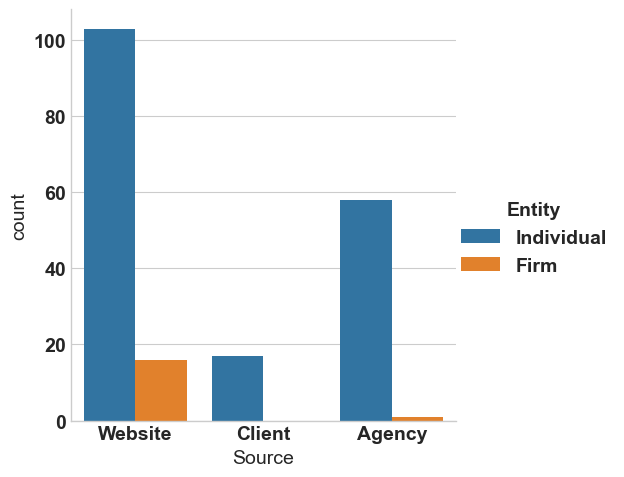

In [972]:
sns.catplot(kind='count', data=df, x="Source", hue="Entity", errorbar=None)
plt.show()

Как видим, больше всего клиентов обращаются в риелторское агентство через интернет-сайт. "Сарафанное радио" (Client) работает довольно плохо. Возможно, причина в недовольстве покупателей обслуживанием. Узнаем об этом позже.

Однако если компания получает прибыль не от факта совершения сделки, а как процент от стоимости проданной недвижимости (т.е. чем дороже проданная недвижимость, чем большую прибыль получает компания), то интереснее будет диаграмма распределения стоимости проданной недвижимости в зависимости от источника лида.

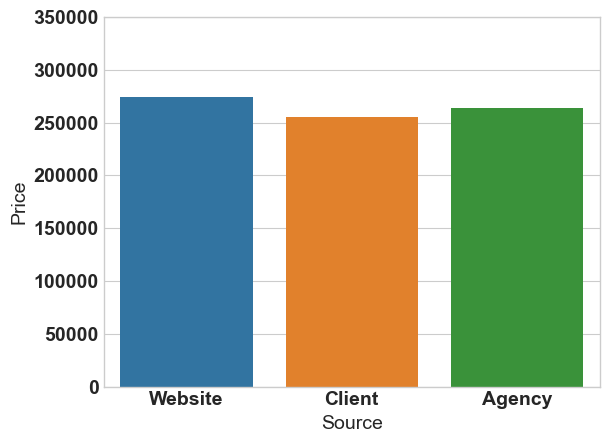

In [973]:
sns.barplot(data=df, x="Source", y="Price", hue = "Source", errorbar=None)
plt.ylim(0,350000)
plt.show()

Ниже представим тепловую диаграмму зависимости средней стоимости приобретаемой недвижимости от источника лида для индивидуальных лиц и фирм.

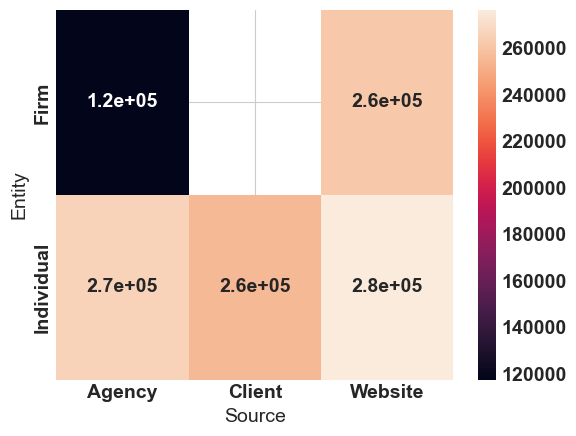

In [974]:
gender_price = df.pivot_table(index="Entity", columns="Source", values="Price", aggfunc="mean")
sns.heatmap(gender_price, annot=True)
plt.show()

Отмечаем, что в случае индивидуальных лиц существенное расхождение между источниками лидов с точки зрения стоимости приобретенной покупателями недвижимости отсутствует, поэтому в данном случае каждый источник лидов одинако ценен для риелторской компании. Однако в случае фирм те, клиенты, которые пришли через веб-сайт в среднем тратили значительно больше на приобретение недвижимости, чем клиенты, которые пришли через агентство (при этом следует учитывать небольшую выборку данных, касающихся фирм, поэтому данные могут быть сильно искажены).

Кроме того, следует обратить внимание на то, что вне зависимости от возраста индивидуальных покупателей все источники лидов были одинаково полезны с точки зрения стоимости приобретенной индивидуальными лицами недвижимости. Это довольно неожиданный вывод, поскольку интернет-сайт мог быть более предпочтительным для более молодых покупателей, а агентство и предыдущие клиенты ("сарафанное радио") - для более возрастных клиентов.

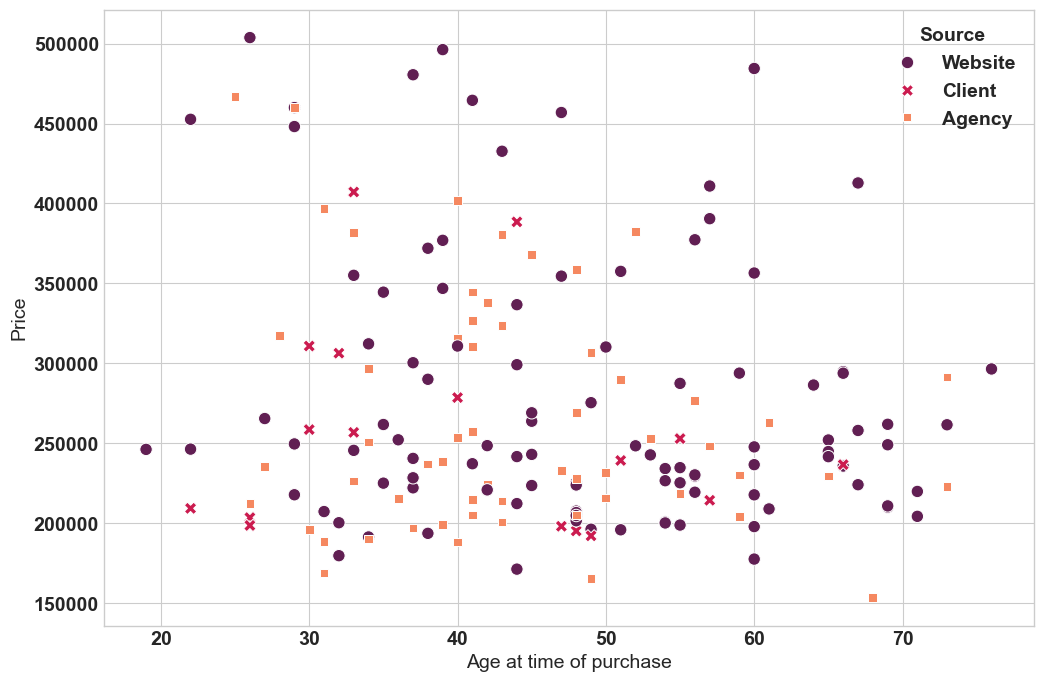

In [975]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="Age at time of purchase", y="Price", size = "Source", hue="Source", sizes = (80, 80), style = "Source", palette="rocket")
plt.show()

В зависимости от пола индивидуальных покупателей различия между стоимостью приобретенной недвижимости с точки зрения источника лидов также отсутствуют.

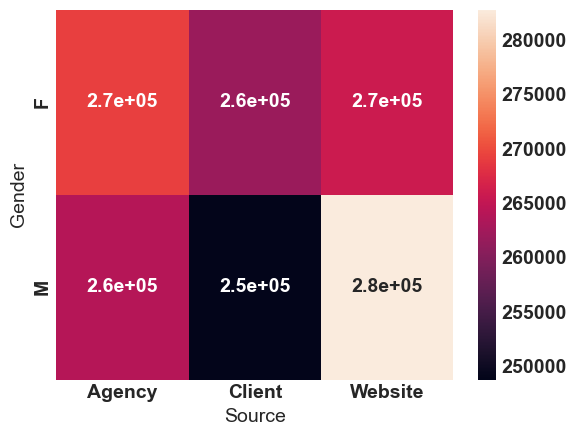

In [976]:
gender_price = df.pivot_table(index="Gender", columns="Source", values="Price", aggfunc="mean")
sns.heatmap(gender_price, annot=True)
plt.show()

Также отметим, что большинство недвижимости приобреталось без ипотечного залога как в случае индивидуальных лиц, так и фирм.

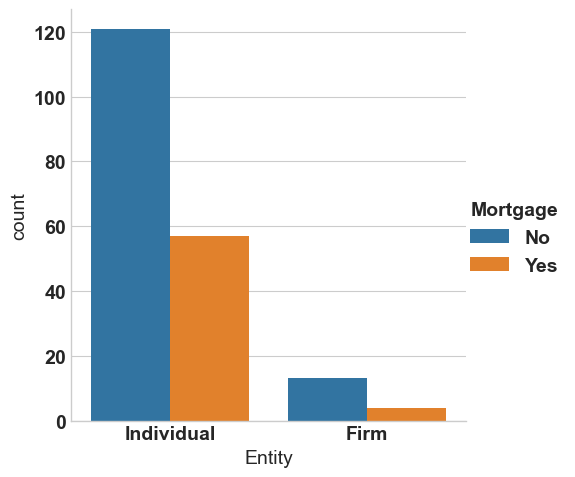

In [977]:
sns.catplot(kind='count', data=df, x="Entity", hue="Mortgage", errorbar=None)
plt.show()

В целом, клиенты были удовлетворены оказанной услугой. Однако немало индивидуальных лиц (более 40) выставили негативные оценки. При этом оценки не зависели от стоимости приобретенной недвижимости.

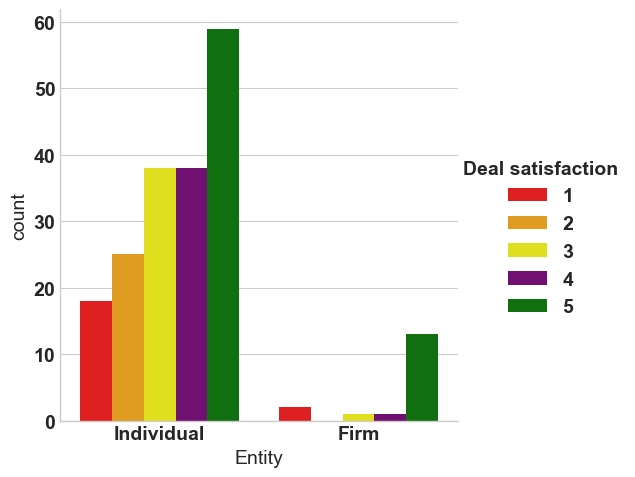

In [978]:
sns.catplot(kind='count', data=df, x="Entity", hue="Deal satisfaction", errorbar=None, palette=["red", "orange", "yellow", "purple", "green"])
plt.show()

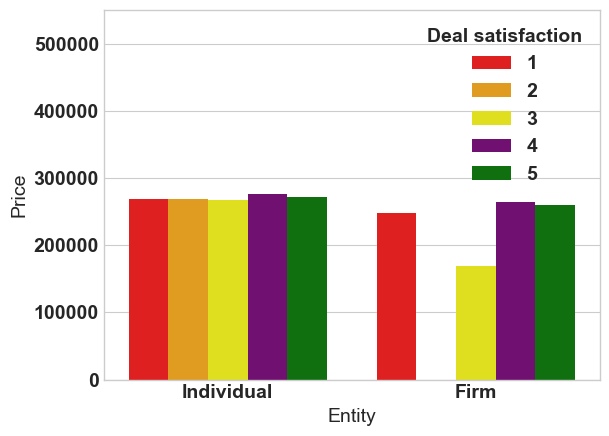

In [979]:
sns.barplot(data=df, x="Entity", y = "Price", hue="Deal satisfaction", errorbar=None, palette=["red", "orange", "yellow", "purple", "green"])
plt.ylim(0, 550000)
plt.show()

#### Таким образом, портрет целевого покупателя в данной риелторской компании следующий. Это мужчина в возрасте от 36 до 45 лет, который приобретает жилую недвижимость площадью около 800 кв. футов и готов потратить на нее около 240 тыс. долл. Однако разброс его финансовых возможностей и пожеланий с точки зрения площади помещения велик. Часто приобретает офисную недвижимость. Покупатель намерен проживать в приобретенной недвижимости, однако нередко приобретает недвижимость в инвестиционных целях. С точки зрения количества приобретенных объектов чаще всего источником лидов является интернет-сайт, однако с точки зрения средней стоимости объекта недвижимости различия между источниками лидов отсутствуют. Целевой клиент приобретал недвижимость без ипотечного залога. В целом, он был удовлетворен оказанной услугой, но немала доля недовольных клиентов, при этом средняя стоимость приобретенной квартиры не зависит от удовлетворенности сделкой.